# ML Project 2

## Importing Libraries and Data

In [2]:
import os 
os.chdir("C:/Users/ogulc/ÖNEMLİ ÇALIŞMALAR")

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

ModuleNotFoundError: No module named 'seaborn'

In [6]:
project_2 = pd.read_csv("diabetes.csv")
project_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Analysing Data

### .info()

In [6]:
project_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### .shape

In [7]:
project_2.shape

(768, 9)

### .columns

In [8]:
project_2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### .unique ve nunique()

In [9]:
project_2["Outcome"].nunique()

2

In [10]:
project_2["Outcome"].unique()

array([1, 0], dtype=int64)

### .count()

In [11]:
project_2.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

### .isnull().sum()

In [12]:
project_2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### .duplicated() ve drop_duplicated()

In [14]:
project_2.duplicated().sum()

0

### .value_counts()

In [15]:
project_2["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### .corr() ve heatmap

<Axes: >

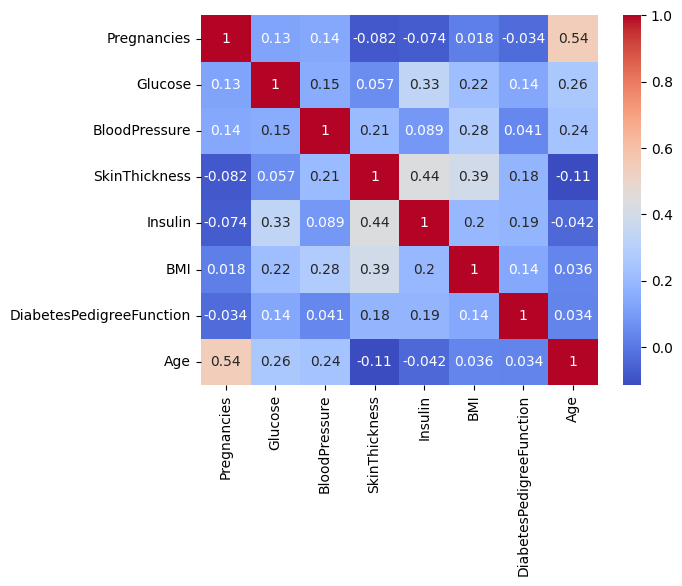

In [21]:
cor = project_2.drop(columns = "Outcome", axis = 1).corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')

### .describe

In [29]:
project_2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### .groupby()

In [30]:
project_2.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


## Separating Data and Labels

In [33]:
X = project_2.drop(columns = "Outcome", axis = 1)
y = project_2["Outcome"]

In [34]:
X.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


In [35]:
y.head(2)

0    1
1    0
Name: Outcome, dtype: int64

## Training and Test Data

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


## Data Standardization

In [44]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [45]:
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

## Model Training (Linear SVC, Polynomial SVC, Radial Basis Funciton SVC)

In [53]:
#Linear SVC Modelinin oluşturulması ve eğitilmesi
lnr_svc = SVC(kernel = "linear")
lnr_svc.fit(X_train_std, y_train)

SVC(kernel='linear')

In [54]:
#Polynomial SVC Modelinin oluşturulması ve eğitilmesi
poly_svc = SVC(kernel = "poly")
poly_svc.fit(X_train_std, y_train)

SVC(kernel='poly')

In [55]:
#RBF SVC Modelinin oluşturulması ve eğitilmesi
rbf_svc = SVC(kernel = "rbf")
rbf_svc.fit(X_train_std, y_train)

SVC()

## Model Evaluation

### Linear SVC 

In [66]:
#Linear SVC Modeli için Model Değerlendirmesi
lnr_svc_pred = lnr_svc.predict(X_test_std)
print("Linear SVC Modelinin Train setindeki doğruluk:", lnr_svc.score(X_train_std, y_train))
print("Linear SVC Modelinin Test setindeki doğruluk:", lnr_svc.score(X_test_std, y_test))
print("Linear SVC Modelinin Accuracy (Doğruluk) skoru:", accuracy_score(y_test, lnr_svc_pred))
print("Linear SVC Modelinin Precision (Hassasiyet) skoru:", precision_score(y_test, lnr_svc_pred))
print("Linear SVC Modelinin Recall (Duyarlılık) skoru:", recall_score(y_test, lnr_svc_pred))
print("Linear SVC Modelinin F1 skoru:", f1_score(y_test, lnr_svc_pred))

Linear SVC Modelinin Train setindeki doğruluk: 0.7719869706840391
Linear SVC Modelinin Test setindeki doğruluk: 0.7662337662337663
Linear SVC Modelinin Accuracy (Doğruluk) skoru: 0.7662337662337663
Linear SVC Modelinin Precision (Hassasiyet) skoru: 0.6285714285714286
Linear SVC Modelinin Recall (Duyarlılık) skoru: 0.4888888888888889
Linear SVC Modelinin F1 skoru: 0.55


C:\Users\ozero\AppData\Local\Temp\ipykernel_16152\2661362168.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Dataset', y='Accuracy', data=accuracy_data, palette='viridis')


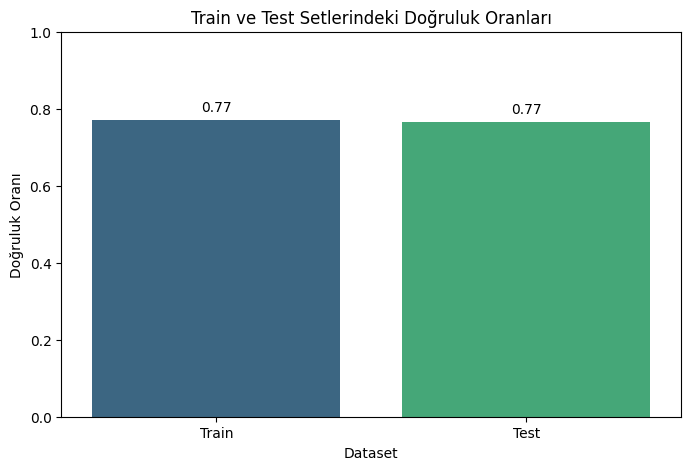

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Doğruluk oranları
train_accuracy = 0.7719869706840391
test_accuracy = 0.7662337662337663

# Doğruluk oranları grafiği
plt.figure(figsize=(8, 5))
accuracy_data = {
    'Dataset': ['Train', 'Test'],
    'Accuracy': [train_accuracy, test_accuracy]
}
ax = sns.barplot(x='Dataset', y='Accuracy', data=accuracy_data, palette='viridis')
plt.title('Train ve Test Setlerindeki Doğruluk Oranları')
plt.ylim(0, 1)
plt.ylabel('Doğruluk Oranı')

# Değerleri grafik üzerinde gösterme
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

C:\Users\ozero\AppData\Local\Temp\ipykernel_16152\189922597.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Metric', y='Score', data=score_data, palette='viridis')


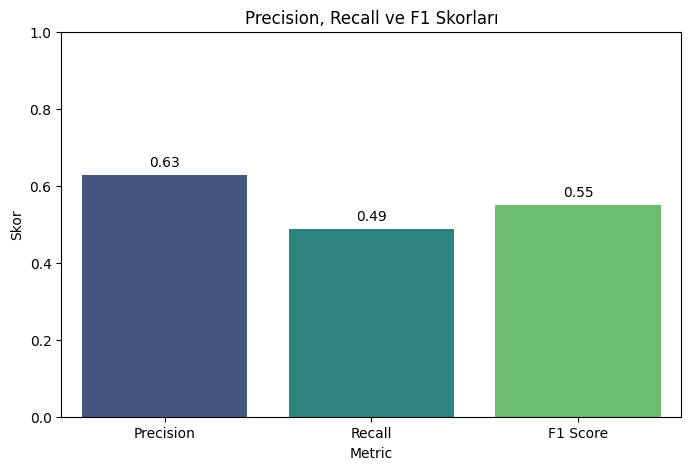

In [79]:
# Precision, Recall ve F1 skorları
precision = 0.6285714285714286
recall = 0.4888888888888889
f1_score = 0.55

# Precision, Recall ve F1 skoru grafiği
plt.figure(figsize=(8, 5))
score_data = {
    'Metric': ['Precision', 'Recall', 'F1 Score'],
    'Score': [precision, recall, f1_score]
}
ax = sns.barplot(x='Metric', y='Score', data=score_data, palette='viridis')
plt.title('Precision, Recall ve F1 Skorları')
plt.ylim(0, 1)
plt.ylabel('Skor')

# Değerleri grafik üzerinde gösterme
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

### Polynomial SVC 

In [67]:
#Polynomial SVC Modeli için Model Değerlendirmesi
poly_svc_pred = poly_svc.predict(X_test_std)
print("Polynomial SVC Modelinin Train setindeki doğruluk:", poly_svc.score(X_train_std, y_train))
print("Polynomial SVC Modelinin Test setindeki doğruluk:", poly_svc.score(X_test_std, y_test))
print("Polynomial SVC Modelinin Accuracy (Doğruluk) skoru:", accuracy_score(y_test, poly_svc_pred))
print("Polynomial SVC Modelinin Precision (Hassasiyet) skoru:", precision_score(y_test, poly_svc_pred))
print("Polynomial SVC Modelinin Recall (Duyarlılık) skoru:", recall_score(y_test, poly_svc_pred))
print("Polynomial SVC Modelinin F1 skoru:", f1_score(y_test, poly_svc_pred))

Polynomial SVC Modelinin Train setindeki doğruluk: 0.8013029315960912
Polynomial SVC Modelinin Test setindeki doğruluk: 0.7857142857142857
Polynomial SVC Modelinin Accuracy (Doğruluk) skoru: 0.7857142857142857
Polynomial SVC Modelinin Precision (Hassasiyet) skoru: 0.75
Polynomial SVC Modelinin Recall (Duyarlılık) skoru: 0.4
Polynomial SVC Modelinin F1 skoru: 0.5217391304347826


C:\Users\ozero\AppData\Local\Temp\ipykernel_16152\2304516942.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Dataset', y='Accuracy', data=accuracy_data_poly, palette='viridis')


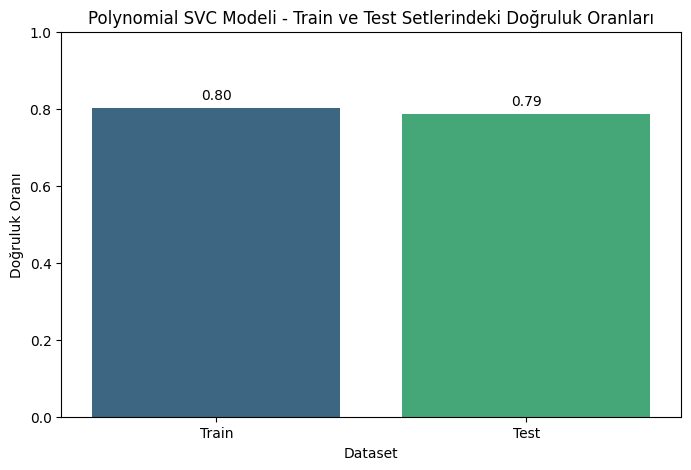

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Doğruluk oranları
train_accuracy_poly = 0.8013029315960912
test_accuracy_poly = 0.7857142857142857

# Doğruluk oranları grafiği
plt.figure(figsize=(8, 5))
accuracy_data_poly = {
    'Dataset': ['Train', 'Test'],
    'Accuracy': [train_accuracy_poly, test_accuracy_poly]
}
ax = sns.barplot(x='Dataset', y='Accuracy', data=accuracy_data_poly, palette='viridis')
plt.title('Polynomial SVC Modeli - Train ve Test Setlerindeki Doğruluk Oranları')
plt.ylim(0, 1)
plt.ylabel('Doğruluk Oranı')

# Değerleri grafik üzerinde gösterme
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()


C:\Users\ozero\AppData\Local\Temp\ipykernel_16152\3908428610.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Metric', y='Score', data=score_data_poly, palette='viridis')


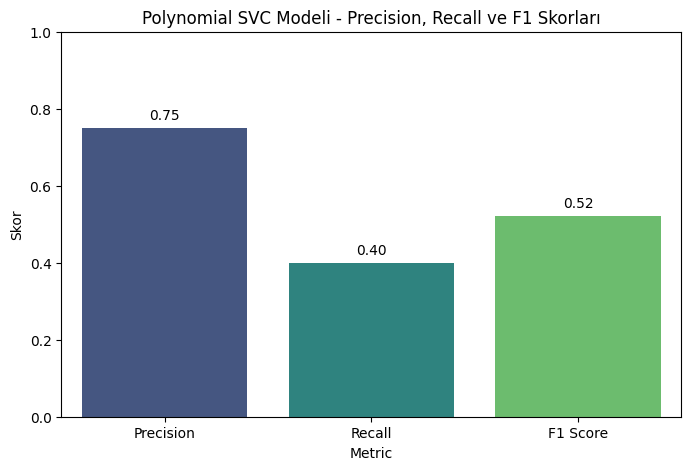

In [81]:
# Precision, Recall ve F1 skorları
precision_poly = 0.75
recall_poly = 0.4
f1_score_poly = 0.5217391304347826

# Precision, Recall ve F1 skoru grafiği
plt.figure(figsize=(8, 5))
score_data_poly = {
    'Metric': ['Precision', 'Recall', 'F1 Score'],
    'Score': [precision_poly, recall_poly, f1_score_poly]
}
ax = sns.barplot(x='Metric', y='Score', data=score_data_poly, palette='viridis')
plt.title('Polynomial SVC Modeli - Precision, Recall ve F1 Skorları')
plt.ylim(0, 1)
plt.ylabel('Skor')

# Değerleri grafik üzerinde gösterme
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()


### RBF SVC

In [69]:
#Radial Basis Function (RBF) SVC Modeli için Model Değerlendirmesi
rbf_svc_pred = rbf_svc.predict(X_test_std)
print("RBF SVC Modelinin Train setindeki doğruluk:", rbf_svc.score(X_train_std, y_train))
print("RBF SVC Modelinin Test setindeki doğruluk:", rbf_svc.score(X_test_std, y_test))
print("RBF SVC Modelinin Accuracy (Doğruluk) skoru:", accuracy_score(y_test, rbf_svc_pred))
print("RBF SVC Modelinin Precision (Hassasiyet) skoru:", precision_score(y_test, rbf_svc_pred))
print("RBF SVC Modelinin Recall (Duyarlılık) skoru:", recall_score(y_test, rbf_svc_pred))
print("RBF SVC Modelinin F1 skoru:", f1_score(y_test, rbf_svc_pred))

RBF SVC Modelinin Train setindeki doğruluk: 0.8306188925081434
RBF SVC Modelinin Test setindeki doğruluk: 0.7467532467532467
RBF SVC Modelinin Accuracy (Doğruluk) skoru: 0.7467532467532467
RBF SVC Modelinin Precision (Hassasiyet) skoru: 0.5833333333333334
RBF SVC Modelinin Recall (Duyarlılık) skoru: 0.4666666666666667
RBF SVC Modelinin F1 skoru: 0.5185185185185185


C:\Users\ozero\AppData\Local\Temp\ipykernel_16152\280426458.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Dataset', y='Accuracy', data=accuracy_data_rbf, palette='viridis')


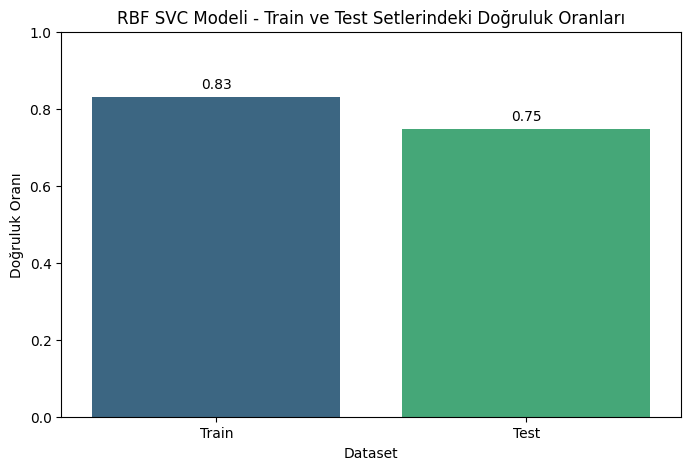

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Doğruluk oranları
train_accuracy_rbf = 0.8306188925081434
test_accuracy_rbf = 0.7467532467532467

# Doğruluk oranları grafiği
plt.figure(figsize=(8, 5))
accuracy_data_rbf = {
    'Dataset': ['Train', 'Test'],
    'Accuracy': [train_accuracy_rbf, test_accuracy_rbf]
}
ax = sns.barplot(x='Dataset', y='Accuracy', data=accuracy_data_rbf, palette='viridis')
plt.title('RBF SVC Modeli - Train ve Test Setlerindeki Doğruluk Oranları')
plt.ylim(0, 1)
plt.ylabel('Doğruluk Oranı')

# Değerleri grafik üzerinde gösterme
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()


C:\Users\ozero\AppData\Local\Temp\ipykernel_16152\2750768255.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Metric', y='Score', data=score_data_rbf, palette='viridis')


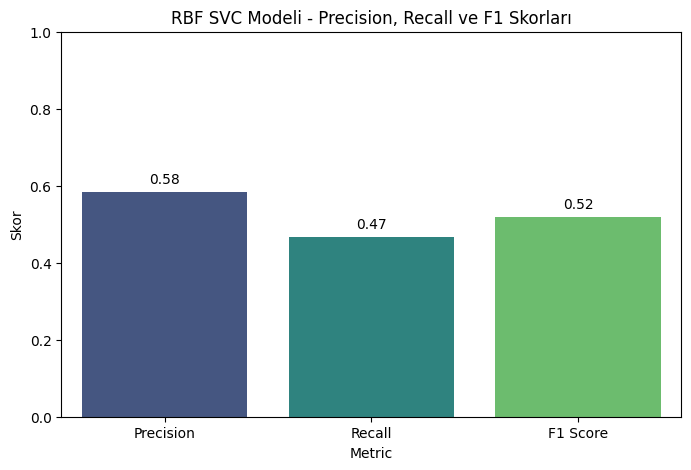

In [83]:
# Precision, Recall ve F1 skorları
precision_rbf = 0.5833333333333334
recall_rbf = 0.4666666666666667
f1_score_rbf = 0.5185185185185185

# Precision, Recall ve F1 skoru grafiği
plt.figure(figsize=(8, 5))
score_data_rbf = {
    'Metric': ['Precision', 'Recall', 'F1 Score'],
    'Score': [precision_rbf, recall_rbf, f1_score_rbf]
}
ax = sns.barplot(x='Metric', y='Score', data=score_data_rbf, palette='viridis')
plt.title('RBF SVC Modeli - Precision, Recall ve F1 Skorları')
plt.ylim(0, 1)
plt.ylabel('Skor')

# Değerleri grafik üzerinde gösterme
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()


## With 'classification_models' Function

In [70]:
def classification_models(X_train, y_train, X_test, y_test):
    from sklearn.linear_model import LogisticRegression
    from sklearn.linear_model import RidgeClassifier
    from sklearn.svm import SVC
    from sklearn.svm import LinearSVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    
    models = [("Logistic Regression", LogisticRegression()),
             ("Ridge Classifier", RidgeClassifier()),
             ("Support Vector Classifier", SVC()),
             ("Linear Support Vector Classifier", LinearSVC()),
             ("KNN Classifier", KNeighborsClassifier()),
             ("Random Forest Classifier", RandomForestClassifier()),
             ("Gradient Boosting Classifier", GradientBoostingClassifier()),
             ("Naive Bayes Classifier", GaussianNB())]

    names = []
    finalResults = []

    for name,model in models:
        model.fit(X_train, y_train)
        model_results = model.predict(X_test)
        
        score_accuracy = accuracy_score(y_test, model_results)
        score_precision = precision_score(y_test, model_results, average = "macro")
        score_recall = recall_score(y_test, model_results, average = "macro")
        score_f1 = f1_score(y_test, model_results, average = "macro")
        
        names.append(name)
        finalResults.append({
            "Model": name,
            "Accuracy": score_accuracy,
            "Precision": score_precision,
            "Recall": score_recall,
            "F1": score_f1
        })

    return finalResults

In [72]:
classification_models(X_train_std, y_train, X_test_std, y_test)

C:\Users\ozero\.conda\envs\R\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\ozero\.conda\envs\R\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[{'Model': 'Logistic Regression',
  'Accuracy': 0.7662337662337663,
  'Precision': 0.7176470588235294,
  'Recall': 0.6848114169215087,
  'F1': 0.6960526315789474},
 {'Model': 'Ridge Classifier',
  'Accuracy': 0.7662337662337663,
  'Precision': 0.7176470588235294,
  'Recall': 0.6848114169215087,
  'F1': 0.6960526315789474},
 {'Model': 'Support Vector Classifier',
  'Accuracy': 0.7467532467532467,
  'Precision': 0.6899717514124294,
  'Recall': 0.6645259938837921,
  'F1': 0.6733561755588187},
 {'Model': 'Linear Support Vector Classifier',
  'Accuracy': 0.7662337662337663,
  'Precision': 0.7176470588235294,
  'Recall': 0.6848114169215087,
  'F1': 0.6960526315789474},
 {'Model': 'KNN Classifier',
  'Accuracy': 0.7402597402597403,
  'Precision': 0.6844751728472659,
  'Recall': 0.6795107033639144,
  'F1': 0.6818181818181819},
 {'Model': 'Random Forest Classifier',
  'Accuracy': 0.7402597402597403,
  'Precision': 0.683142672134686,
  'Recall': 0.672986748216106,
  'F1': 0.6773517703750261},
 {